In [14]:
from scipy import stats
from matplotlib import pyplot as plt
import numpy as np

In [89]:
def create_distribution(size, process="normal", *args, **kwargs):
    u = getattr(np.random, process)(size=size, *args, **kwargs)
    bins = np.linspace(u.min(), u.max(), 30)
    histogram, bins = np.histogram(u, bins=bins, density=True)
    bin_centers = 0.5*(bins[1:] + bins[:-1])
    plt.figure(figsize=(6, 4))
    plt.plot(bin_centers, histogram, label="Histogram of samples")
    plt.legend()
    plt.show()
    return histogram, bin_centers

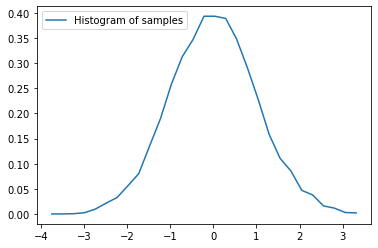

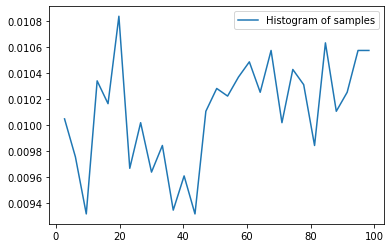

In [105]:
weights_u, bins_u = create_distribution(loc=0, scale=1, size=10000, process="normal")
weights_v, bins_v = create_distribution(process="uniform", size=10000, low=1, high=100)

In [106]:
stats.wasserstein_distance(bins_u, bins_v, weights_u, weights_v)

51.020074390359134

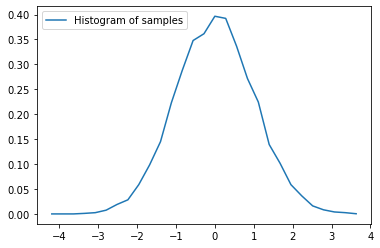

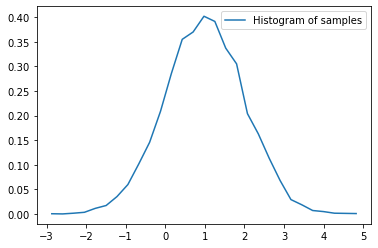

In [121]:
weights_u, bins_u = create_distribution(loc=0, scale=1, size=10000, process="normal")
weights_v, bins_v = create_distribution(loc=1, scale=1, size=10000, process="normal")

In [120]:
stats.wasserstein_distance(bins_u, bins_v, weights_u, weights_v)

1.7208567989708856

### Barycenters with POT

In [1]:
import numpy as np
import matplotlib.pylab as pl
import ot
# necessary for 3d plot even if not used
from mpl_toolkits.mplot3d import Axes3D  # noqa
from matplotlib.collections import PolyCollection

#### Generate data (gaussians)

In [12]:
#%% parameters

n = 100  # nb bins

# bin positions
x = np.arange(n, dtype=np.float64)

# Gaussian distributions
a1 = ot.datasets.get_1D_gauss(n, m=20, sigma=5)  # m= mean, s= std
a2 = ot.datasets.get_1D_gauss(n, m=60, sigma=2)

# creating matrix A containing all distributions
A = np.vstack((a1, a2)).T
n_distributions = A.shape[1]

# loss matrix + normalization
M = ot.utils.dist0(n)
M /= M.max()

#### Plot the gaussians

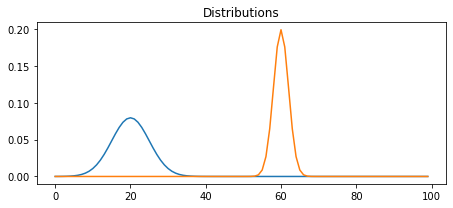

In [13]:
pl.figure(1, figsize=(6.4, 3))
for i in range(n_distributions):
    pl.plot(x, A[:, i])
pl.title('Distributions')
pl.tight_layout()

#### Compute the barycenters

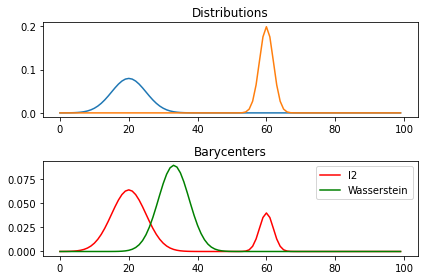

In [14]:
alpha = 0.2  # 0<=alpha<=1
weights = np.array([1 - alpha, alpha])

# l2bary
bary_l2 = A.dot(weights)

# wasserstein
reg = 1e-3
bary_wass = ot.bregman.barycenter(A, M, reg, weights)

pl.figure(2)
pl.clf()
pl.subplot(2, 1, 1)
for i in range(n_distributions):
    pl.plot(x, A[:, i])
pl.title('Distributions')

pl.subplot(2, 1, 2)
pl.plot(x, bary_l2, 'r', label='l2')
pl.plot(x, bary_wass, 'g', label='Wasserstein')
pl.legend()
pl.title('Barycenters')
pl.tight_layout()

In [ ]:
(height, width, colors)

In [19]:
img = np.random.randn(24, 24)

In [20]:
from matplotlib.pyplot import imshow

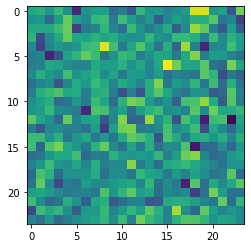

In [21]:
imshow(img)

In [22]:
img.reshape(24 * 24)

array([ 4.49904008e-01,  6.23019617e-01,  1.04415949e-01,  8.92475573e-01,
       -1.01800300e-01, -2.68337726e+00, -1.01630365e-01,  2.69818711e-01,
        2.80532468e-01, -1.12494179e+00, -7.12647539e-01, -1.70196822e+00,
        8.58705638e-01, -6.22116873e-02,  9.50358559e-02, -5.81567491e-01,
       -2.62631902e-01,  4.75532874e-02,  2.69309280e+00,  2.68028116e+00,
       -5.43139744e-02,  2.61685213e-01, -1.75566302e+00,  1.63495232e+00,
       -1.37012770e-01,  2.80817232e-02, -1.29020611e+00,  1.69834067e-01,
        1.48169833e+00,  1.63544325e-01, -3.58998480e-01,  8.66439703e-01,
        1.01159595e+00, -8.01802395e-01,  1.02663233e+00,  1.69718287e-01,
       -6.04917962e-01,  7.76493850e-02, -1.58716989e+00, -4.06437806e-01,
        2.43255365e-01, -2.47383915e-01,  7.14721246e-01,  6.61060832e-01,
        1.33031997e+00, -9.01683761e-01, -4.60966248e-01, -2.17018508e+00,
        4.88349966e-01,  4.72800555e-01,  4.89152660e-01,  1.00014737e+00,
        1.55952251e+00, -